<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/Report6_MNIST_%EA%B0%95%EB%8F%99%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report6. fashion MNIST 분류

운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련

In [1]:
# 텐서플로 모델을 만들고 훈련할 수 있는 고수준 API인 tf.keras를 사용
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


# 패션 MNIST 데이터셋 임포트하기

In [2]:
#  TensorFlow에서 직접 Fashion MNIST 데이터를 가져오고 로드
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


* train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트
* test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트

* 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이
* 레이블(label)은 0에서 9까지의 정수 배열
* 이 값은 이미지에 있는 옷의 클래스(class)를 나타냄

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색

In [5]:
# 훈련 세트에 60,000개의 이미지가 있다
# 각 이미지는 28x28 픽셀로 표현
train_images.shape

(60000, 28, 28)

In [6]:
# 훈련 세트에는 60,000개의 레이블
len(train_labels)

60000

In [7]:
# 각 레이블은 0과 9사이의 정수
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
# 테스트 세트에는 10,000개의 이미지
test_images.shape

(10000, 28, 28)

In [9]:
# 테스트 세트는 10,000개의 이미지에 대한 레이블
len(test_labels)

10000

# 데이터 전처리

* 네트워크를 훈련하기 전에 데이터를 전처리 해야한다. 
* 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있다.

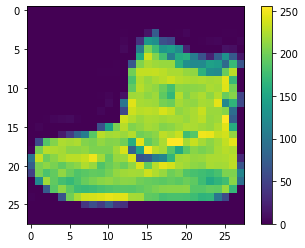

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정

In [11]:
#훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요
train_images = train_images / 255.0
test_images = test_images / 255.0

훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력

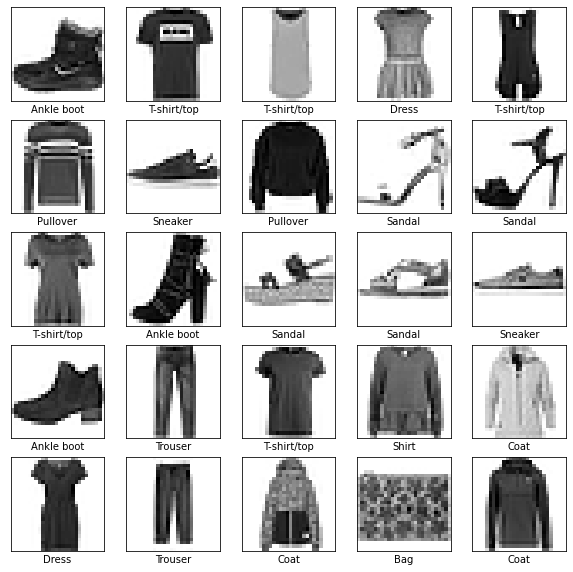

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

In [13]:
# 층 설정
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
# 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환

모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요

* 손실 함수 - 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야한다.
* 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식이다.
* 메트릭 — 훈련 및 테스트 단계를 모니터링하는 데 사용된다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용한다

In [15]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 훈련

신경망 모델을 훈련하려면 다음 단계가 필요합니다.

1. 훈련 데이터를 모델에 주입 - 이 예에서는 train_images와 train_labels 배열이다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배운다.
3. 테스트 세트에 대한 모델의 예측 생성 - 이 예에서는 test_images 배열이다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인한다.
4. 예측이 test_labels 배열의 레이블과 일치하는지 확인한다.


 


In [16]:
# 모델 피드
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4950 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3746 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3352 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3125 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2924 - accuracy: 0.8934
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2813 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2670 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2556 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2485 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [17]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3501 - accuracy: 0.8741 - 828ms/epoch - 3ms/step

Test accuracy: 0.8741000294685364


In [18]:
# 예측하기
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [ ]:
# 첫 번째 예측을 확인
predictions[0]

In [20]:
# 가장 높은 신뢰도를 가진 레이블을 찾아보기
np.argmax(predictions[0])

9

In [21]:
# 테스트 레이블을 확인
test_labels[0]

9

In [22]:
# 10개 클래스에 대한 예측을 모두 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

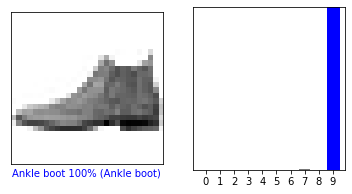

In [23]:
# 예측 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

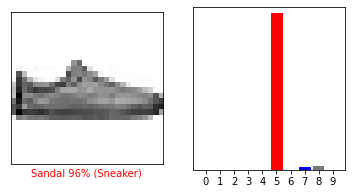

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

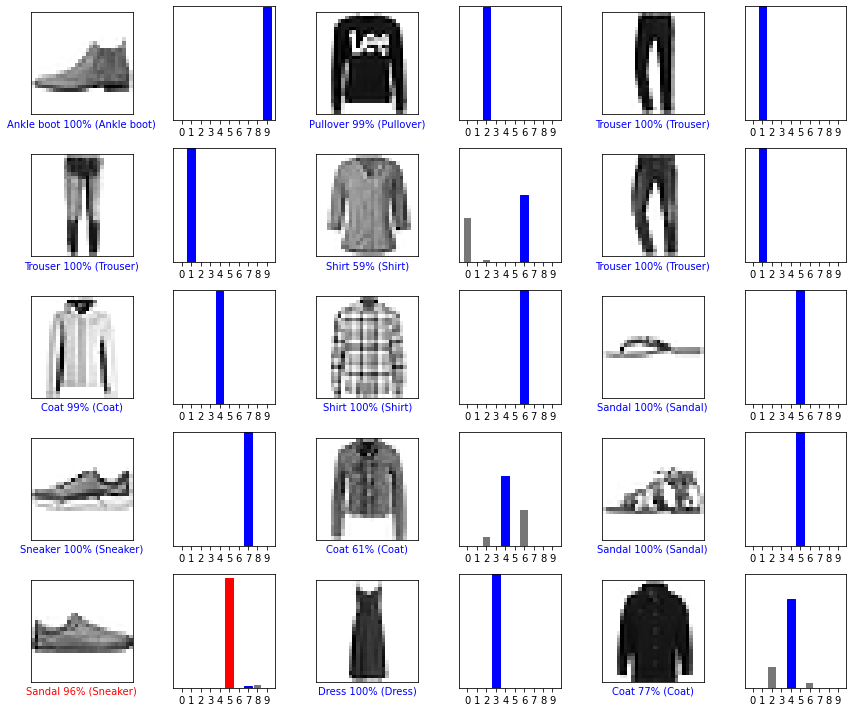

In [25]:
# 몇 개의 이미지의 예측을 출력
# 올바르게 예측된 레이블은 파란색, 잘못 예측된 레이블은 빨강색
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 훈련된 모델 사용하기

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만든다.

In [26]:
img = test_images[1]

print(img.shape)

(28, 28)


* tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있다. 
* 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 한다.

In [27]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
# 이제 이 이미지의 예측을 만든다.
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[1.4152029e-04 1.9016681e-14 9.9428880e-01 7.7097419e-11 9.1241888e-04
  8.7529645e-10 4.6571922e-03 1.2480797e-10 3.4047238e-09 1.3993428e-11]]


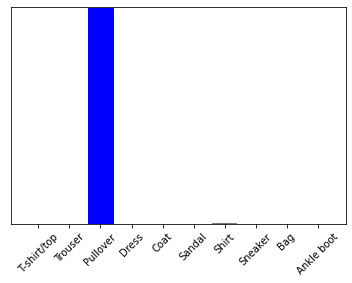

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

* tf.keras.Model.predict는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환한다. 
* 배치에서 (유일한) 이미지에 대한 예측을 가져옵니다.

In [30]:
np.argmax(predictions_single[0])

2

예상과 같이 모델이 레이블을 예측한다.